# Requirements
Make sure to install OpenMP library before trying to use lightgbm or xgboost. 
OpenMP is required for running these libs on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: brew install libomp.


# Examples

In [26]:
import pandas as pd
import xgboost as xgb
from hummingbird.ml import convert
from sklearn.datasets import fetch_california_housing, fetch_openml, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
housing = fetch_california_housing()
# housing = fetch_openml(name="house_prices", as_frame=True)

X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = pd.Series(housing.target)

In [28]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [30]:
xgb_regressor = xgb.XGBRegressor(
    n_estimators=100,
    reg_lambda=1,
    gamma=0,
    max_depth=3,
    base_score=1
)

In [31]:
xgb_regressor.fit(X_train, y_train)

/Users/jean.metz/Library/Caches/pypoetry/virtualenvs/basic-ml-FTSqPe-Q-py3.9/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBRegressor(base_score=1, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=3, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [32]:
%%timeit -r 3

# Vanila model running on CPU
xgb_regressor.predict(X)

4.68 ms ± 104 µs per loop (mean ± std. dev. of 3 runs, 100 loops each)


In [33]:
# Use Hummingbird to convert the model to PyTorch.
hb_model = convert(xgb_regressor, 'torch')

In [34]:
%%timeit -r 3
# Run Hummingbird on CPU - By default CPU execution is used in Hummingbird.
hb_model.predict(X)

60.2 ms ± 789 µs per loop (mean ± std. dev. of 3 runs, 10 loops each)


In [36]:
def run_xgb(dataset, test_size=0.25):
    plt.style.use('ggplot')

    # load the iris datasets
    X = dataset.data
    y = dataset.target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

    # fit a CART model to the data
    model = xgb.XGBClassifier()
    model.fit(X_train, y_train)
    print(format('How to use XgBoost Classifier and Regressor in Python','*^82'))
    print("Model summary:")
    print(model)

    # make predictions
    expected_y  = y_test
    predicted_y = model.predict(X_test)

    # summarize the fit of the model
    print("Classification report:")
    print(metrics.classification_report(expected_y, predicted_y))
    print("Confusion matrix:")
    print(metrics.confusion_matrix(expected_y, predicted_y))

    # summarize the fit of the model
    print(f"r2_score: {metrics.r2_score(expected_y, predicted_y)}")
    print(f"mean_squared_log_error: {metrics.mean_squared_log_error(expected_y, predicted_y)}")

    plt.figure(figsize=(10,10))
    sns.regplot(expected_y, predicted_y, fit_reg=True, scatter_kws={"s": 100})


**************How to use XgBoost Classifier and Regressor in Python***************
[14:12:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity

/Users/jean.metz/Library/Caches/pypoetry/virtualenvs/basic-ml-FTSqPe-Q-py3.9/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/jean.metz/Library/Caches/pypoetry/virtualenvs/basic-ml-FTSqPe-Q-py3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


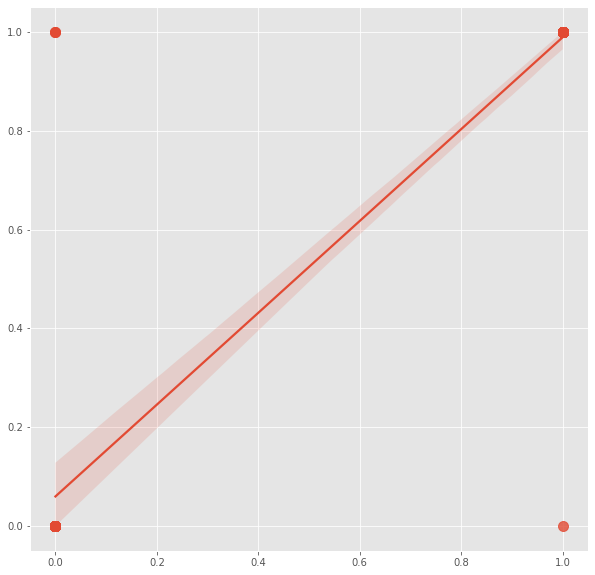

In [37]:
dataset = load_breast_cancer()
run_xgb(dataset)

In [38]:
run_xgb(fetch_california_housing())

**************How to use XgBoost Classifier and Regressor in Python***************


/Users/jean.metz/Library/Caches/pypoetry/virtualenvs/basic-ml-FTSqPe-Q-py3.9/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:12:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


KeyboardInterrupt: 